## Part 1

The data wasn't as complete as I initially expected, with January 1st only having timestamps from 20:00:00 onwards and only having the first half of April's timestamps.  

Between the four months, there weren't any outstanding trends; daily, however, there were fairly consistent trends of a larger amount of logins right before 5:33:20, around/a little after 11:06:40, and around 22:13:20.

Code included below.

## Part 2

1. There would be three times that would see the most changes: dawn, dusk, and weekends. 
Assuming we had each driver ID and their start/stop locations, if the experiment was working 
and did in fact encourage drivers to be available in both cities then we would see more drivers 
that start in one city and end in the other, or end in one city and start in the other. Because 
of the complementary circadian rhythms the cities have, these times make the most sense for drivers 
to be active in both cities and for the managers to focus their attention on. We could note the 
behaviors of drivers before and after this experiment was implemented, and ideally we would see an 
increase in drivers showing up in both cities at these times, instead of them sticking to a single 
city like they (presumably) were before.

2. I would take data from the month prior to the experiment being implemented, and then let the 
experiment run for a week or two before pulling that data for modeling to predict how the rest of 
the month would look, so as to not waste an excess of money if the experiment is not as successful 
as anticipated. I would use the month prior to the experiment to get a sense of the drivers' behaviors
before this incentive was added. Then, with the experiment data and and predicted data I would see how
many more drivers started showing up in both cities. I think a 10-15% increase would be a good sign that 
the experiment is working as intended and would advise the city operations team to do a final check two
months after the experiment has been in place to make sure that the drivers haven't regressed back to
their old behaviors. The issue with only using a week or two week's worth of data is that it might only 
reflect the inital excitement and surge after the experiment gets implemented, but doesn't guarantee that
the trend is sustainable long term. This is why I suggest doing another check a couple months after the 
experiment gets implemented to see if the behaviors are in fact reflecting the predicted behaviors or if 
the behavior captured in the first couple weeks was just initial excitement.

## Part 3

1. Of the 50,000 users that signed up in January, 18,804 were retained. Because the criteria of a retained
user is simply a user that has taken at least one trip in the last 30 days, the easiest way to find these
retained users is to filter the last trip date to the past month.

2. I was reminded of a classification problem that I worked on where I was able to utilize a Random Forest model to predict a customer's intent, so that was what I tried first. Based on whether a customer showed up in the retained subset of the original dataframe, I created a new column for the Random Forest to try and predict. Even without any tweaking any parameters, the Random Forest was able to perform well over 95% in accuracy, recall, and precision. It was able to correctly label 12,160 of the 12,434 users that were tested. 

3. I think it would be in the company's best interest to focus its efforts to cater towards the kinds of customers that historically have been retained. iPhone users particularly dominate both general and retained users, so ensuring that their experience is optimized would likely see an increase without needing to use extra resources to optimize a platform where users aren't likely to stick around anyway. It's easier to get people to stay than to get new people to sign up and stay, so Ultimate might as well play to their strengths and focus on the popular areas and platforms that currently exist.  

Code included below.

## Part 1 Code

In [1]:
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = open('logins.json')
load = json.load(file)
load

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

In [3]:
logins = load['login_time']
logins_agg = {}

interval = 15

for login in logins:
    login_time = datetime.datetime.strptime(login, "%Y-%m-%d %H:%M:%S")
    
    rounded_time = (login_time + datetime.timedelta(minutes=7.5)).replace(second=0, microsecond=0)
    rounded_time -= datetime.timedelta(minutes=rounded_time.minute % interval)
    rounded_time_str = rounded_time.strftime("%Y-%m-%d %H:%M:%S")
    
    if rounded_time not in logins_agg:
        logins_agg[rounded_time] = []
    logins_agg[rounded_time].append(login)
    
logins_agg

{datetime.datetime(1970, 1, 1, 20, 15): ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16'],
 datetime.datetime(1970, 1, 1, 20, 30): ['1970-01-01 20:26:21',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:34:58'],
 datetime.datetime(1970, 1, 1, 20, 45): ['1970-01-01 20:47:52',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:49:12'],
 datetime.datetime(1970, 1, 1, 21, 0): ['1970-01-01 20:56:07',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59'],
 datetime.datetime(1970, 1, 1, 21, 15): ['1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53'],
 datetime.datetime(1970, 1, 1, 21, 30): ['1970-01-01 21:29:19'],
 datetime.datetime(1970, 1, 1, 22, 0

In [4]:
grouped = {key: len(value) for key, value in logins_agg.items()}
grouped

{datetime.datetime(1970, 1, 1, 20, 15): 6,
 datetime.datetime(1970, 1, 1, 20, 30): 8,
 datetime.datetime(1970, 1, 1, 20, 45): 7,
 datetime.datetime(1970, 1, 1, 21, 0): 3,
 datetime.datetime(1970, 1, 1, 21, 15): 4,
 datetime.datetime(1970, 1, 1, 21, 30): 1,
 datetime.datetime(1970, 1, 1, 22, 0): 8,
 datetime.datetime(1970, 1, 1, 21, 45): 1,
 datetime.datetime(1970, 1, 1, 22, 15): 9,
 datetime.datetime(1970, 1, 1, 22, 30): 4,
 datetime.datetime(1970, 1, 1, 23, 0): 7,
 datetime.datetime(1970, 1, 1, 23, 15): 19,
 datetime.datetime(1970, 1, 1, 23, 30): 13,
 datetime.datetime(1970, 1, 1, 23, 45): 16,
 datetime.datetime(1970, 1, 2, 0, 0): 13,
 datetime.datetime(1970, 1, 2, 0, 15): 13,
 datetime.datetime(1970, 1, 2, 0, 30): 14,
 datetime.datetime(1970, 1, 2, 0, 45): 14,
 datetime.datetime(1970, 1, 2, 1, 0): 10,
 datetime.datetime(1970, 1, 2, 1, 15): 8,
 datetime.datetime(1970, 1, 2, 1, 30): 7,
 datetime.datetime(1970, 1, 2, 1, 45): 9,
 datetime.datetime(1970, 1, 2, 2, 0): 9,
 datetime.datetime

In [5]:
grouped_df = pd.DataFrame([grouped]).T
grouped_df

,0
1970-01-01 20:15:00,6
1970-01-01 20:30:00,8
1970-01-01 20:45:00,7
1970-01-01 21:00:00,3
1970-01-01 21:15:00,4
...,...
1970-04-13 18:00:00,3
1970-04-13 18:15:00,6
1970-04-13 18:30:00,3
1970-04-13 18:45:00,7


In [6]:
grouped_df.rename(columns={0:'logins'}, inplace=True)
grouped_df['month'] = grouped_df.index.month
grouped_df['day'] = grouped_df.index.day
grouped_df['time'] = grouped_df.index.time
grouped_df['month'].replace(to_replace={1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr'}, inplace=True)
grouped_df

,logins,month,day,time
1970-01-01 20:15:00,6,Jan,1,20:15:00
1970-01-01 20:30:00,8,Jan,1,20:30:00
1970-01-01 20:45:00,7,Jan,1,20:45:00
1970-01-01 21:00:00,3,Jan,1,21:00:00
1970-01-01 21:15:00,4,Jan,1,21:15:00
...,...,...,...,...
1970-04-13 18:00:00,3,Apr,13,18:00:00
1970-04-13 18:15:00,6,Apr,13,18:15:00
1970-04-13 18:30:00,3,Apr,13,18:30:00
1970-04-13 18:45:00,7,Apr,13,18:45:00


In [7]:
agg_grouped = round(grouped_df.groupby([grouped_df.index.month, grouped_df.index.day]).mean(numeric_only=True), 2)
agg_grouped.reset_index(inplace=True)
agg_grouped.drop(columns=['day'], inplace=True)
agg_grouped

,level_0,level_1,logins
0,1,1,7.57
1,1,2,7.39
2,1,3,8.40
3,1,4,8.47
4,1,5,5.10
...,...,...,...
98,4,9,8.85
99,4,10,11.05
100,4,11,14.71
101,4,12,14.88


In [8]:
agg_grouped.index = agg_grouped['level_0'].astype(str) + '-' + agg_grouped['level_1'].astype(str)
agg_grouped.drop(columns=['level_1'], inplace=True)
agg_grouped.rename(columns={'level_0':'month'}, inplace=True)
agg_grouped.replace(to_replace={1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr'}, inplace=True)
agg_grouped

,month,logins
1-1,Jan,7.57
1-2,Jan,7.39
1-3,Jan,8.40
1-4,Jan,8.47
1-5,Jan,5.10
...,...,...
4-9,Apr,8.85
4-10,Apr,11.05
4-11,Apr,14.71
4-12,Apr,14.88


In [9]:
jan = agg_grouped[agg_grouped['month'] == 'Jan']
jan.describe()

,logins
count,31.000000
mean,7.694516
std,1.879610
min,5.100000
25%,6.130000
50%,7.270000
75%,8.865000
max,11.530000


In [10]:
feb = agg_grouped[agg_grouped['month'] == 'Feb']
feb.describe()

,logins
count,28.000000
mean,9.555000
std,3.037367
min,5.160000
25%,7.085000
50%,9.455000
75%,11.827500
max,15.850000


In [11]:
mar = agg_grouped[agg_grouped['month'] == 'Mar']
mar.describe()

,logins
count,31.000000
mean,11.682581
std,3.578475
min,6.650000
25%,8.210000
50%,11.880000
75%,15.130000
max,18.140000


In [12]:
apr = agg_grouped[agg_grouped['month'] == 'Apr']
apr.describe()

,logins
count,13.000000
mean,11.256923
std,4.301010
min,5.390000
25%,7.510000
50%,11.050000
75%,14.710000
max,19.920000


To get a sense of what the monthly distributions look like for Jan-Mar, I'm going to plot all of the data despite April having less than half the data than the other months.

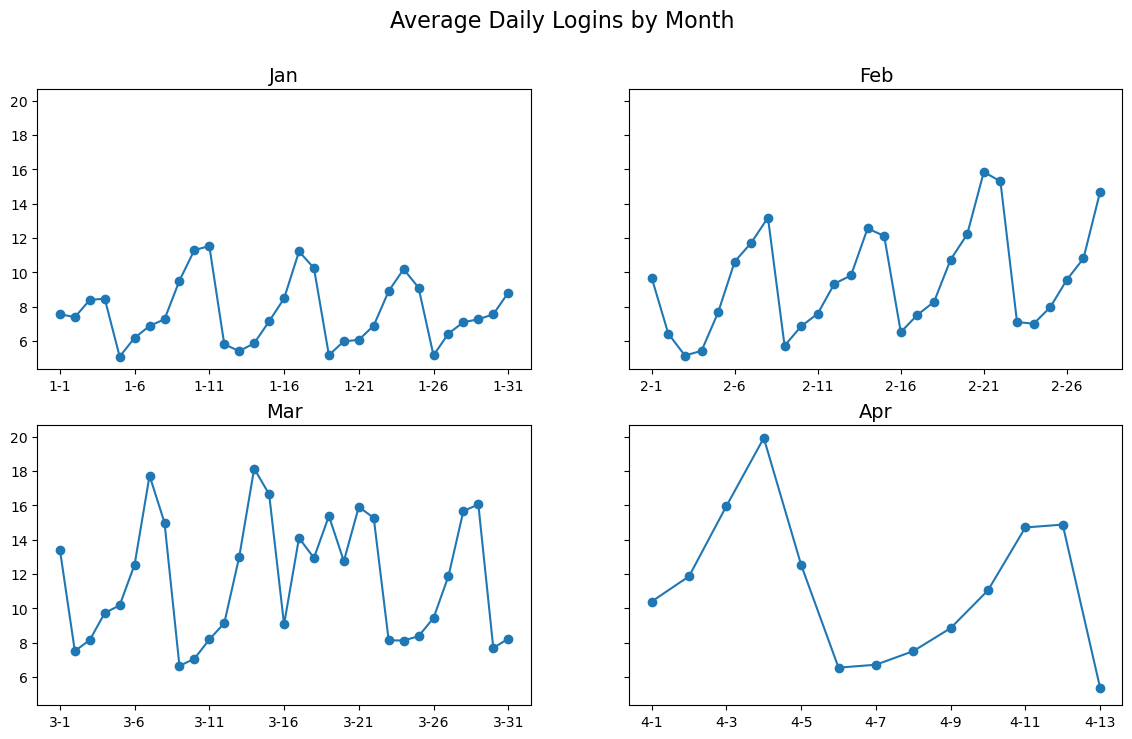

In [13]:
months = ['Jan', 'Feb', 'Mar', 'Apr']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14,8), sharey=True)
fig.suptitle('Average Daily Logins by Month', fontsize=16)

for month, ax in zip(months, axs.ravel()):
    agg_grouped[agg_grouped['month'] == month].plot(ax=ax, marker='o')
    
    ax.set_title(month, fontsize=14)
    ax.get_legend().remove()
    ax.set_xlabel('')
    
plt.show()

January and February had similar peaks at three different points in the month, but March does not follow that trend.

Because April only has data until the 13th, I'm going to narrow the scope of the other graphs so they're all the same scale.

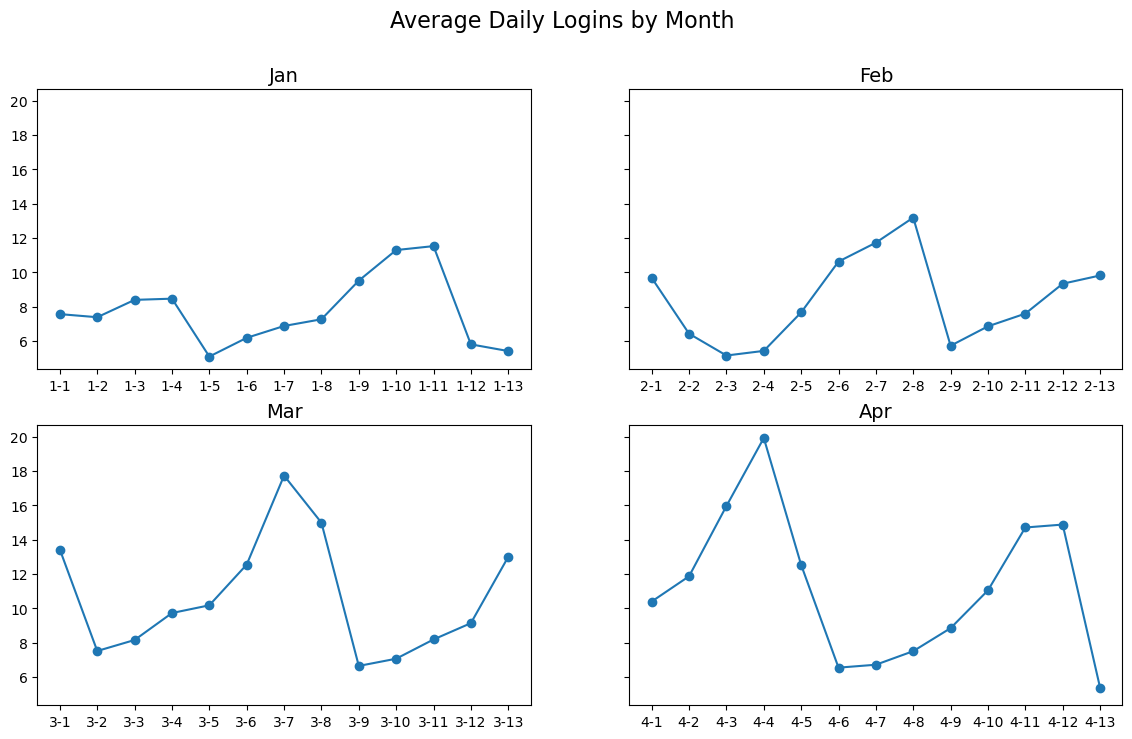

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14,8), sharey=True)
fig.suptitle('Average Daily Logins by Month', fontsize=16)

axs[0,0].plot(agg_grouped.index[:13], agg_grouped['logins'][:13], marker='o')
axs[0,0].set_title('Jan', fontsize=14)
axs[0,1].plot(agg_grouped.index[31:44], agg_grouped['logins'][31:44], marker='o')
axs[0,1].set_title('Feb', fontsize=14)
axs[1,0].plot(agg_grouped.index[59:72], agg_grouped['logins'][59:72], marker='o')
axs[1,0].set_title('Mar', fontsize=14)
axs[1,1].plot(agg_grouped.index[90:], agg_grouped['logins'][90:], marker='o')
axs[1,1].set_title('Apr', fontsize=14)

plt.show()

February and March have similar rises in logins around the 7th and 8th of the month, but January and April don't have this pattern.

In [15]:
jan = grouped_df[grouped_df['month'] == 'Jan']
feb = grouped_df[grouped_df['month'] == 'Feb']
mar = grouped_df[grouped_df['month'] == 'Mar']
apr = grouped_df[grouped_df['month'] == 'Apr']

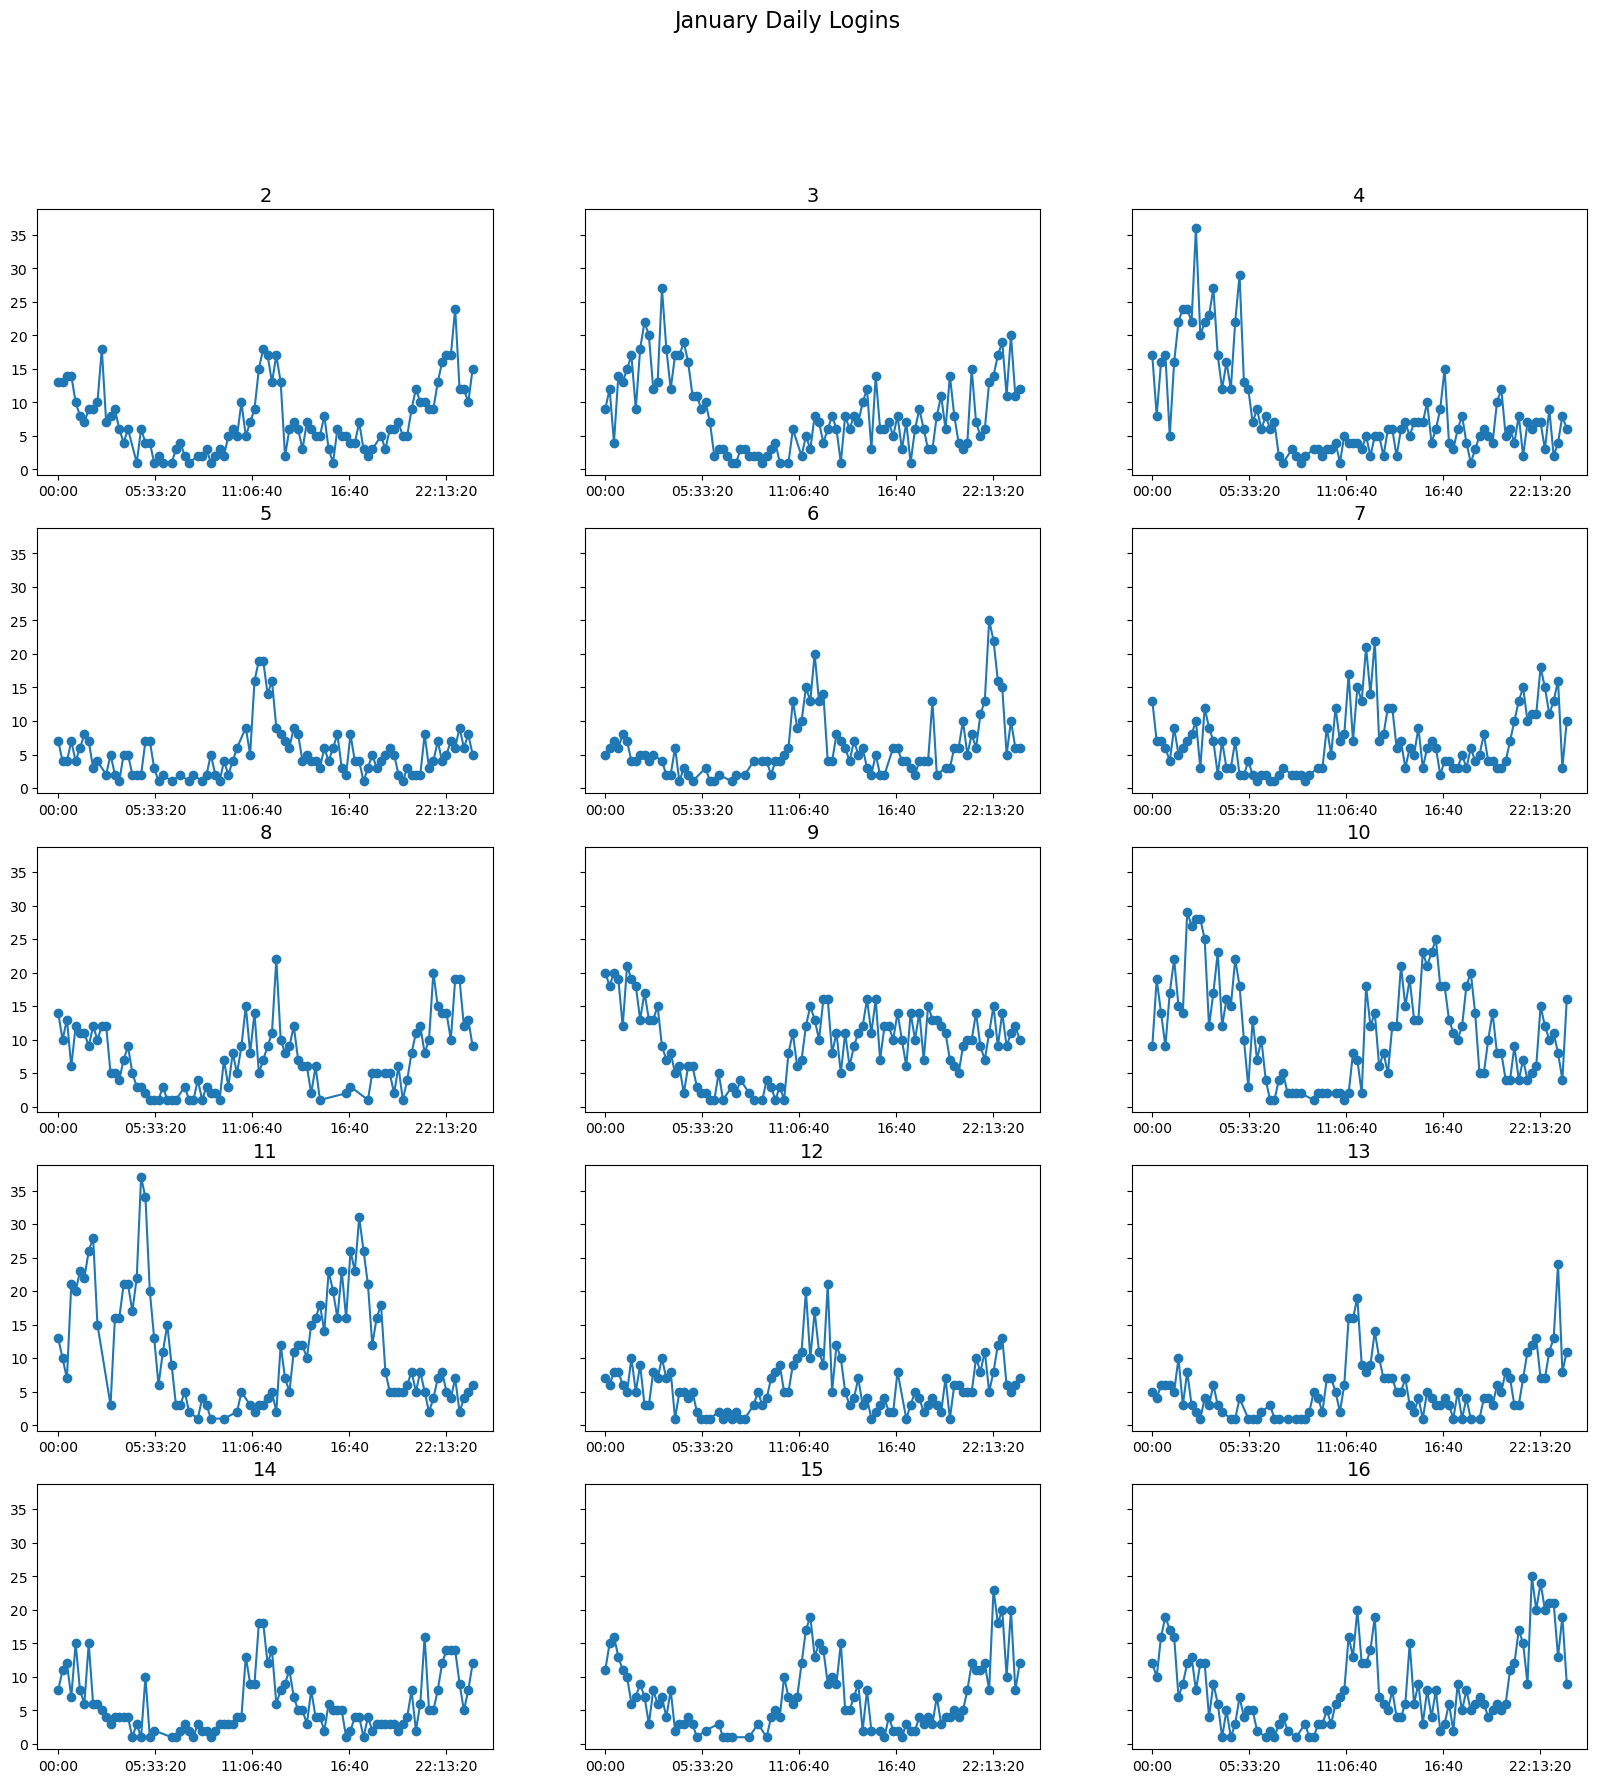

In [16]:
days = range(2, 17)

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,20), sharey=True)
fig.suptitle('January Daily Logins', fontsize=16)

for day, ax in zip(days, axs.ravel()):
    jan_day = jan[jan['day'] == day]
    jan_day.plot(x='time', y='logins', ax=ax, marker='o')
    
    ax.set_title(day, fontsize=14)
    ax.get_legend().remove()
    ax.set_xlabel('')
    
plt.show()

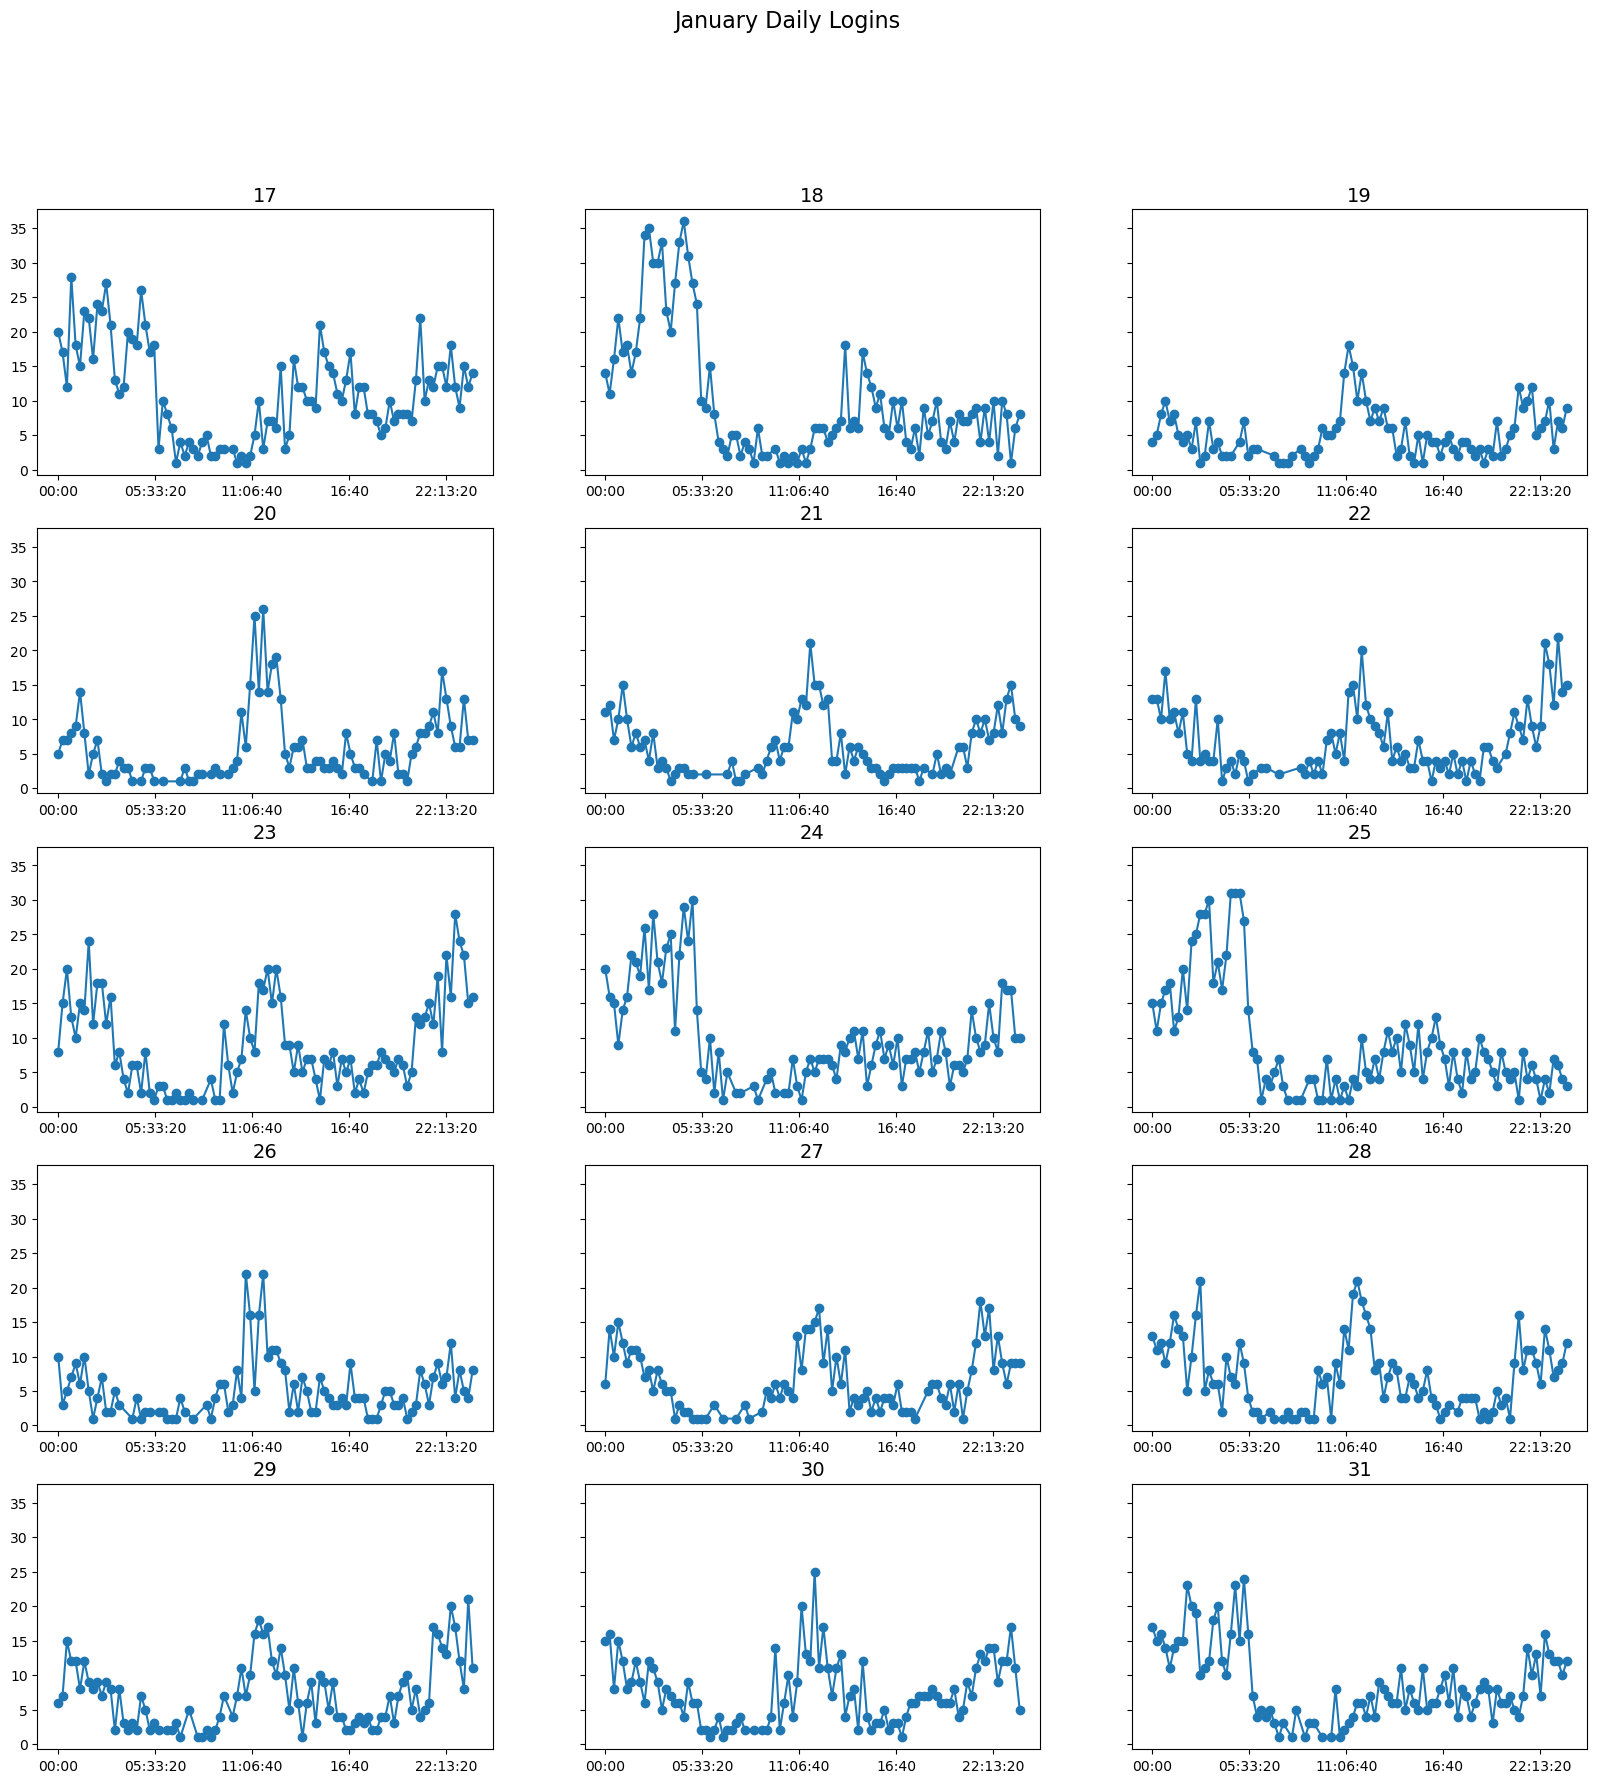

In [17]:
days = range(17, 32)

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,20), sharey=True)
fig.suptitle('January Daily Logins', fontsize=16)

for day, ax in zip(days, axs.ravel()):
    jan_day = jan[jan['day'] == day]
    jan_day.plot(x='time', y='logins', ax=ax, marker='o')
    
    ax.set_title(day, fontsize=14)
    ax.get_legend().remove()
    ax.set_xlabel('')
    
plt.show()

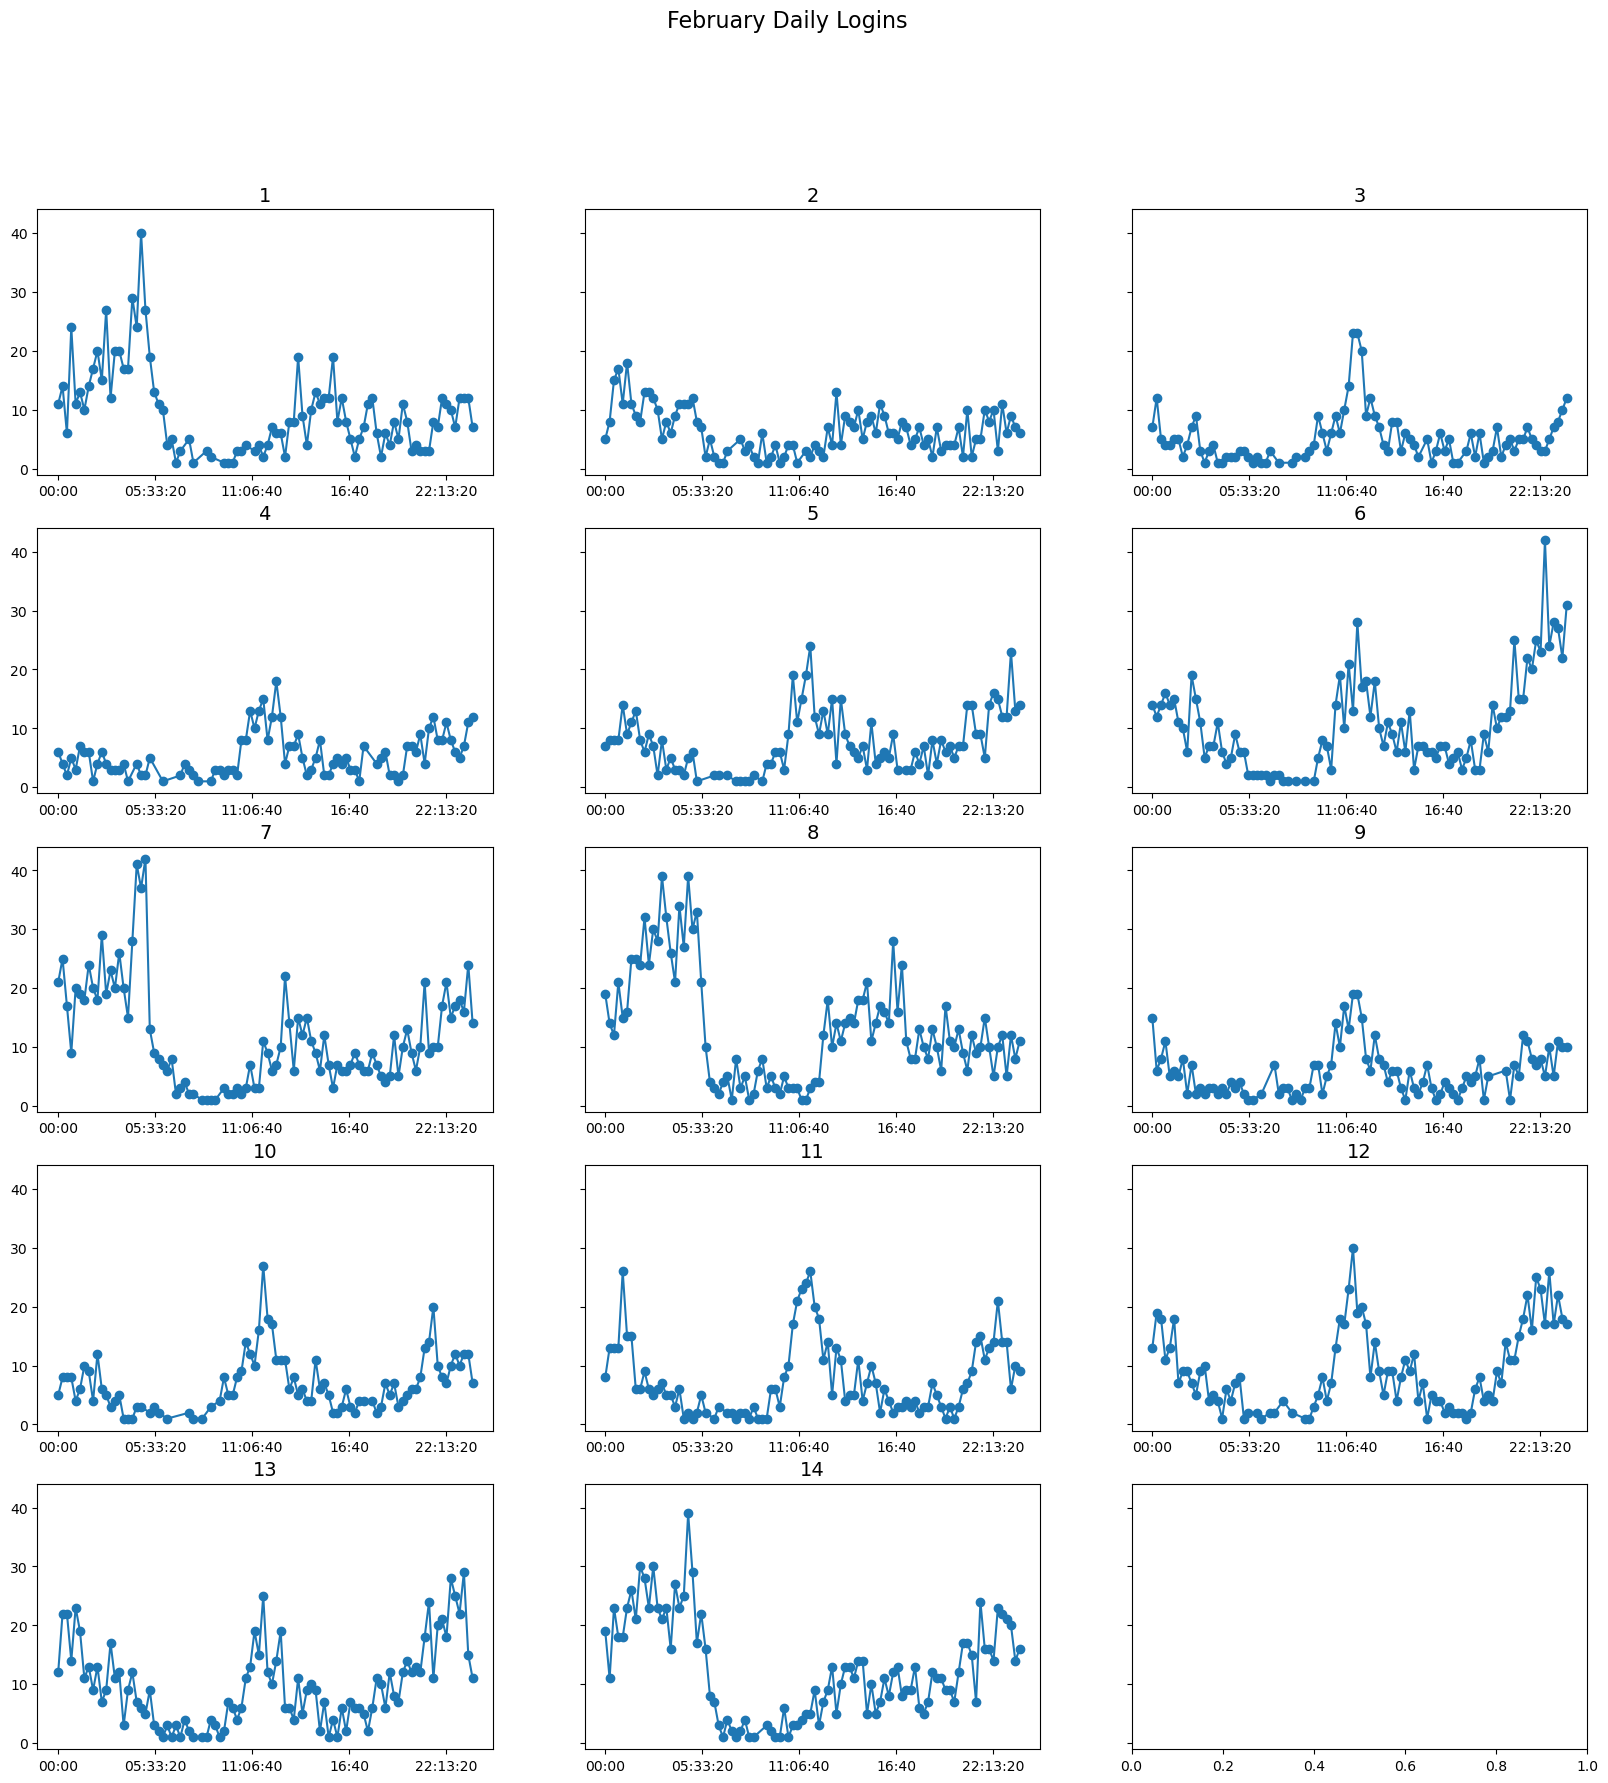

In [18]:
days = range(1, 15)

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,20), sharey=True)
fig.suptitle('February Daily Logins', fontsize=16)

for day, ax in zip(days, axs.ravel()):
    feb_day = feb[feb['day'] == day]
    feb_day.plot(x='time', y='logins', ax=ax, marker='o')
    
    ax.set_title(day, fontsize=14)
    ax.get_legend().remove()
    ax.set_xlabel('')
    
plt.show()

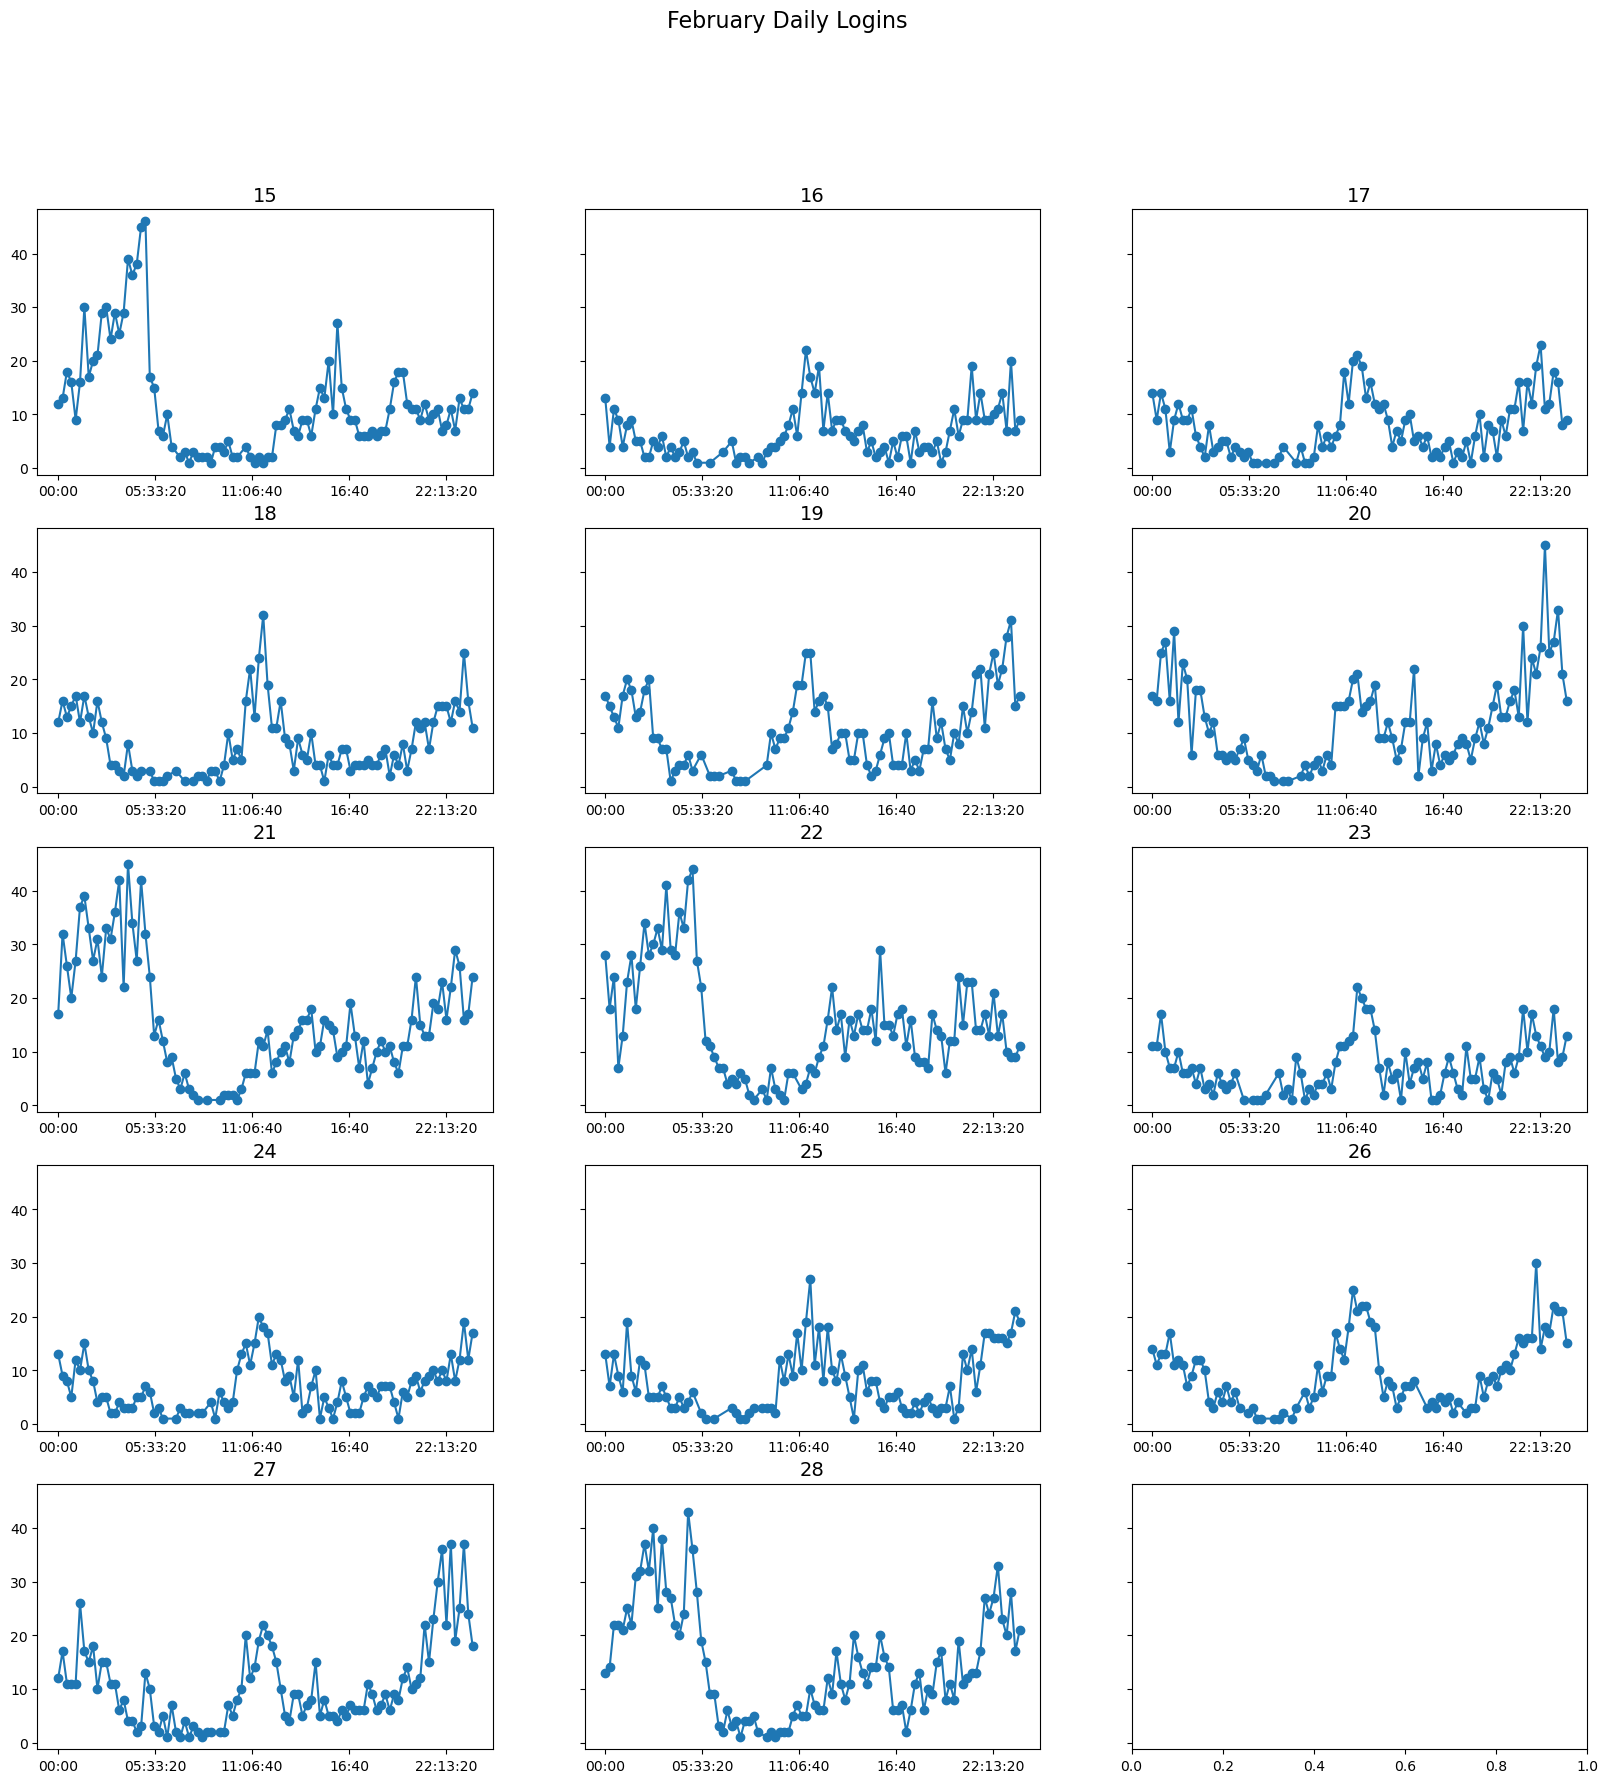

In [19]:
days = range(15, 29)

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,20), sharey=True)
fig.suptitle('February Daily Logins', fontsize=16)

for day, ax in zip(days, axs.ravel()):
    feb_day = feb[feb['day'] == day]
    feb_day.plot(x='time', y='logins', ax=ax, marker='o')
    
    ax.set_title(day, fontsize=14)
    ax.get_legend().remove()
    ax.set_xlabel('')
    
plt.show()

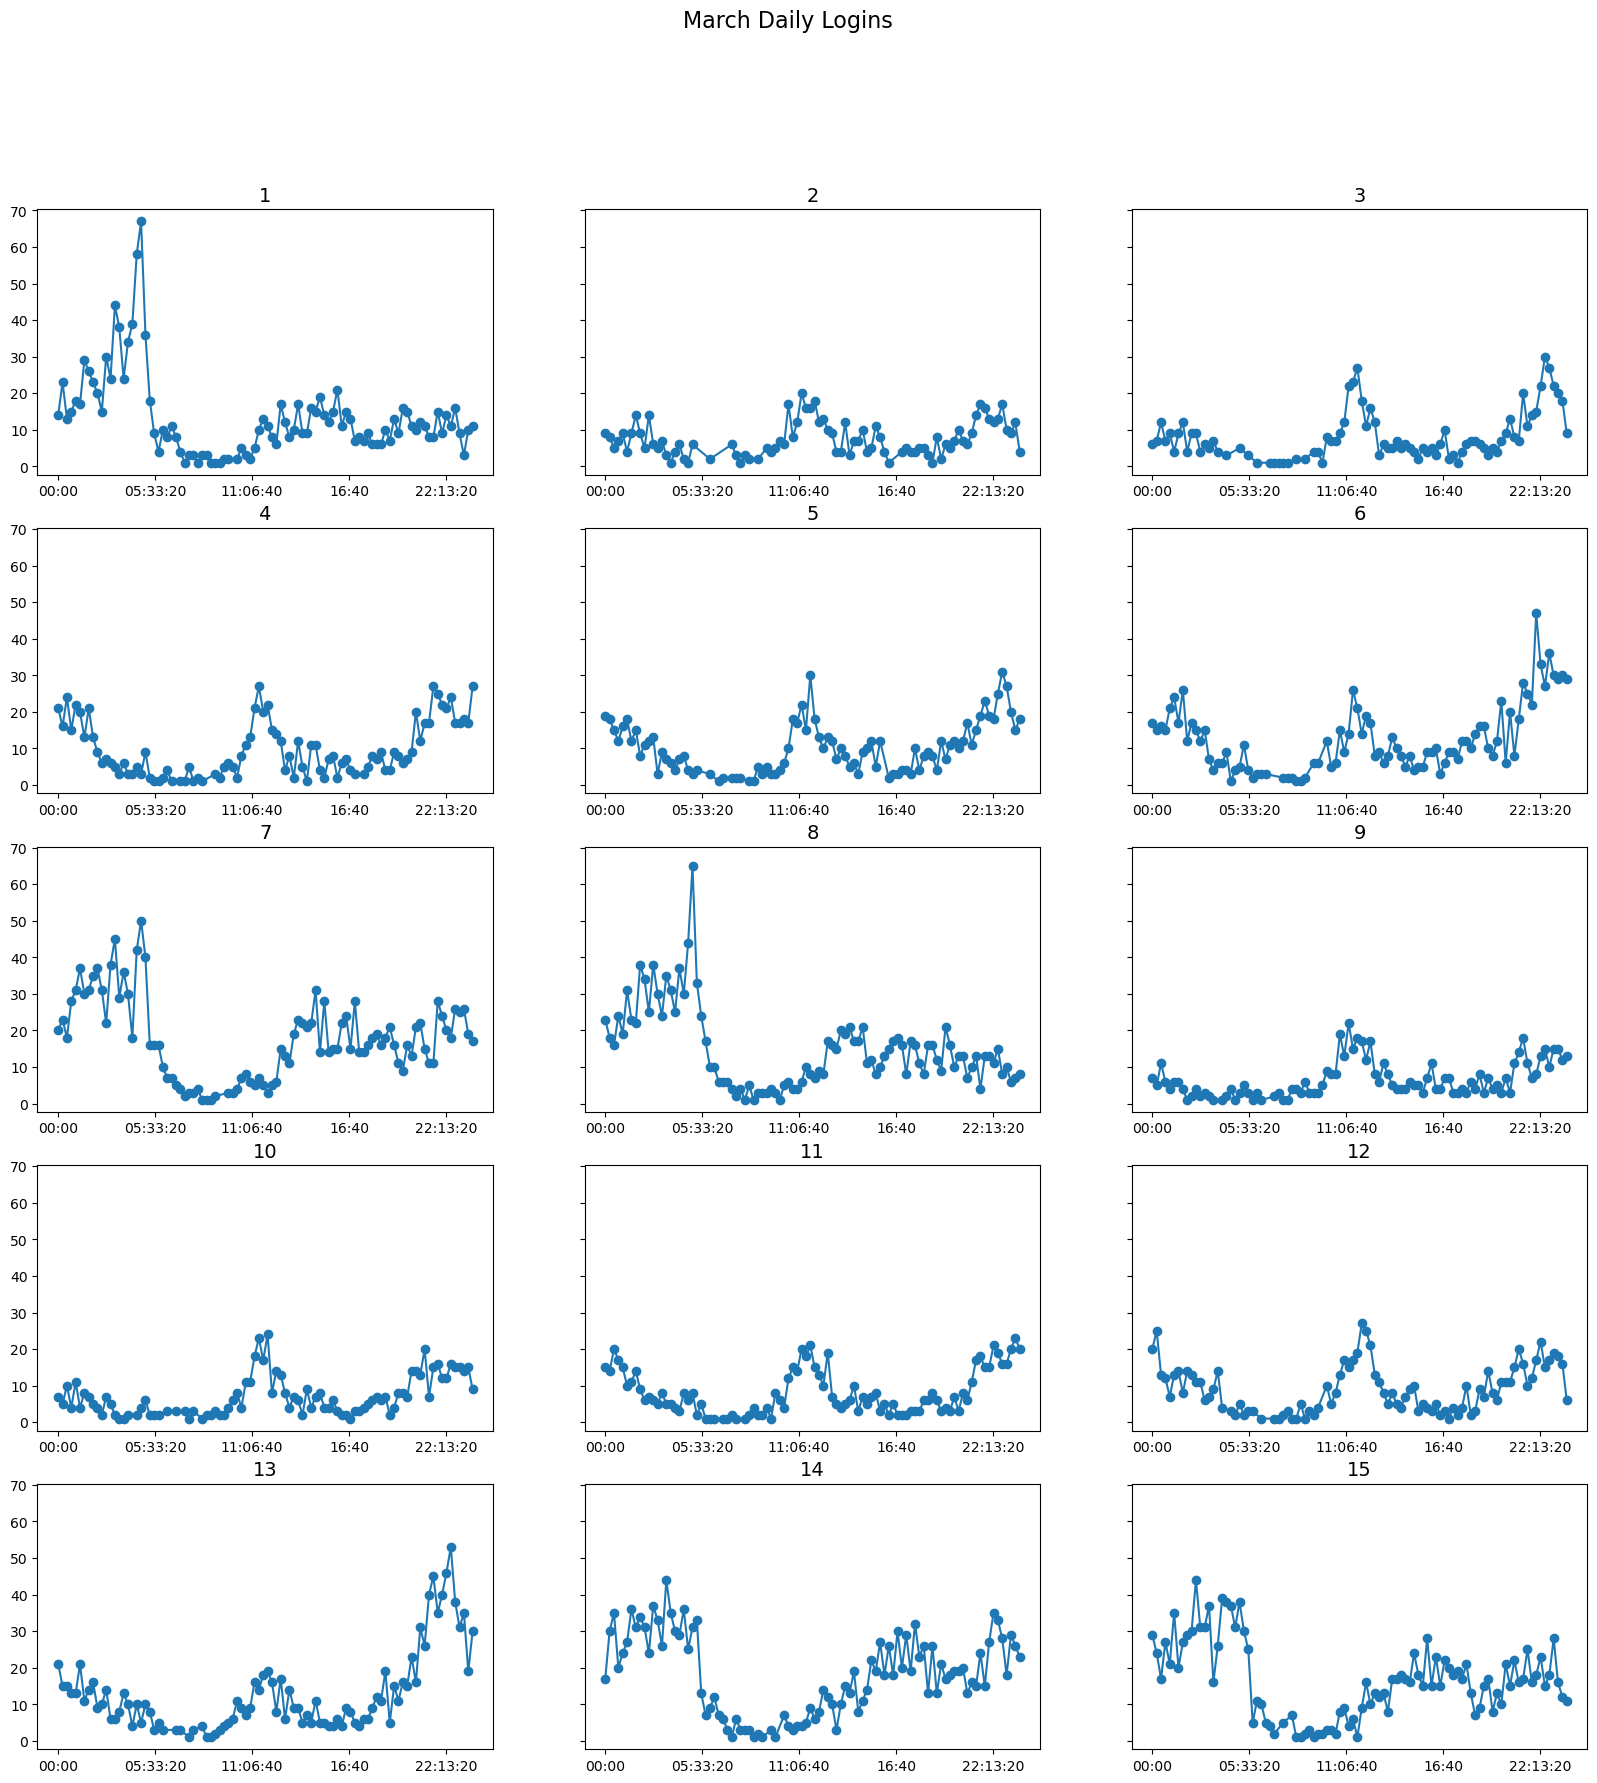

In [20]:
days = range(1, 16)

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,20), sharey=True)
fig.suptitle('March Daily Logins', fontsize=16)

for day, ax in zip(days, axs.ravel()):
    mar_day = mar[mar['day'] == day]
    mar_day.plot(x='time', y='logins', ax=ax, marker='o')
    
    ax.set_title(day, fontsize=14)
    ax.get_legend().remove()
    ax.set_xlabel('')
    
plt.show()

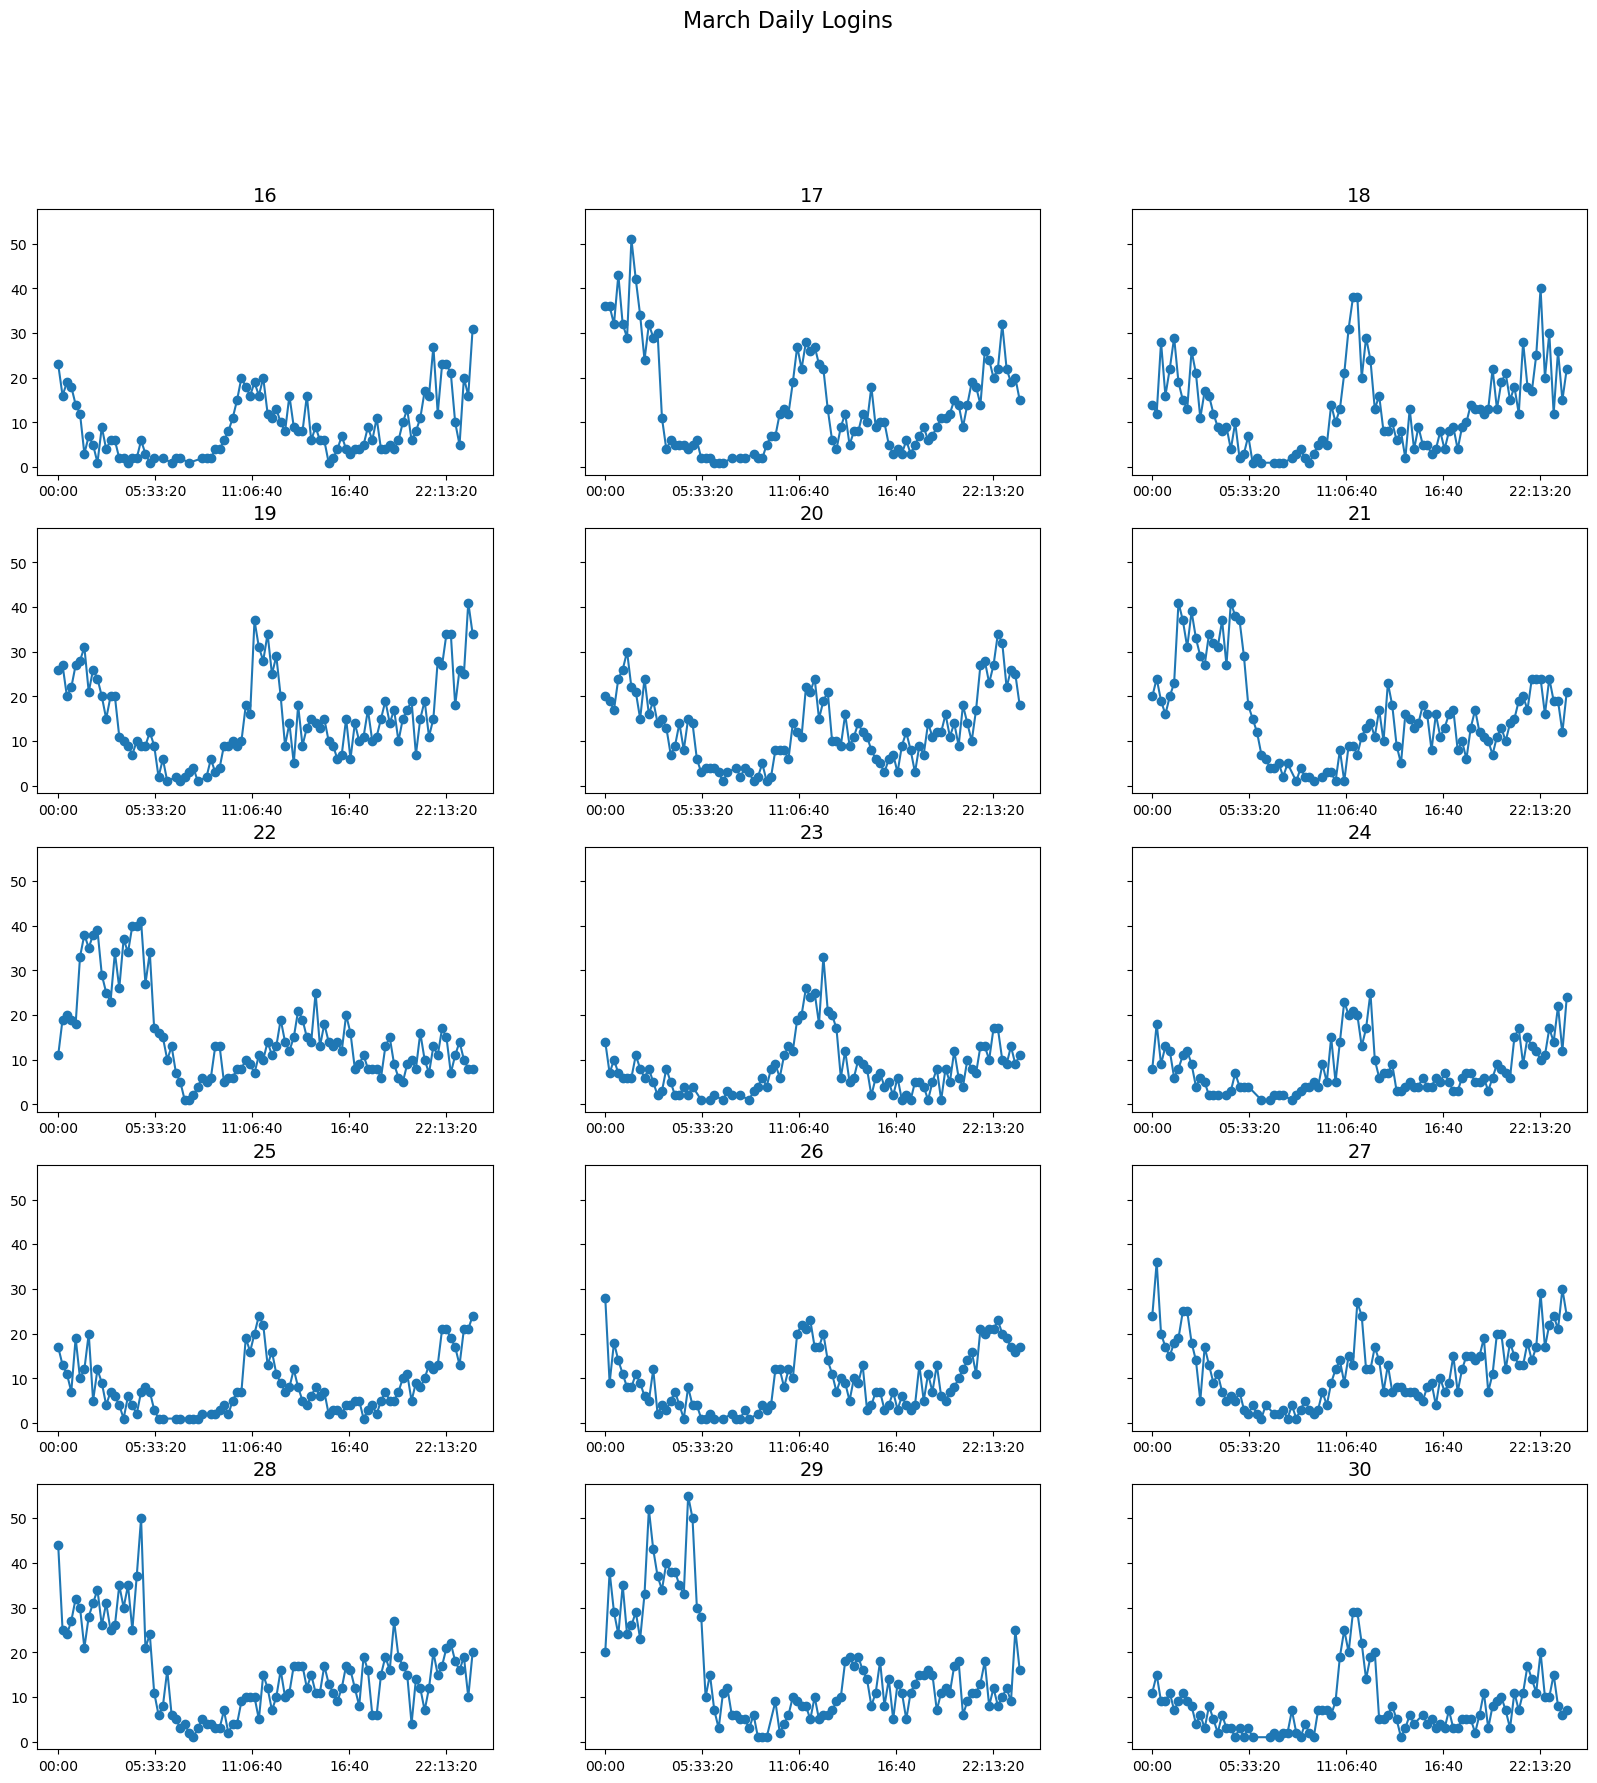

In [21]:
days = range(16, 32)

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,20), sharey=True)
fig.suptitle('March Daily Logins', fontsize=16)

for day, ax in zip(days, axs.ravel()):
    mar_day = mar[mar['day'] == day]
    mar_day.plot(x='time', y='logins', ax=ax, marker='o')
    
    ax.set_title(day, fontsize=14)
    ax.get_legend().remove()
    ax.set_xlabel('')
    
plt.show()

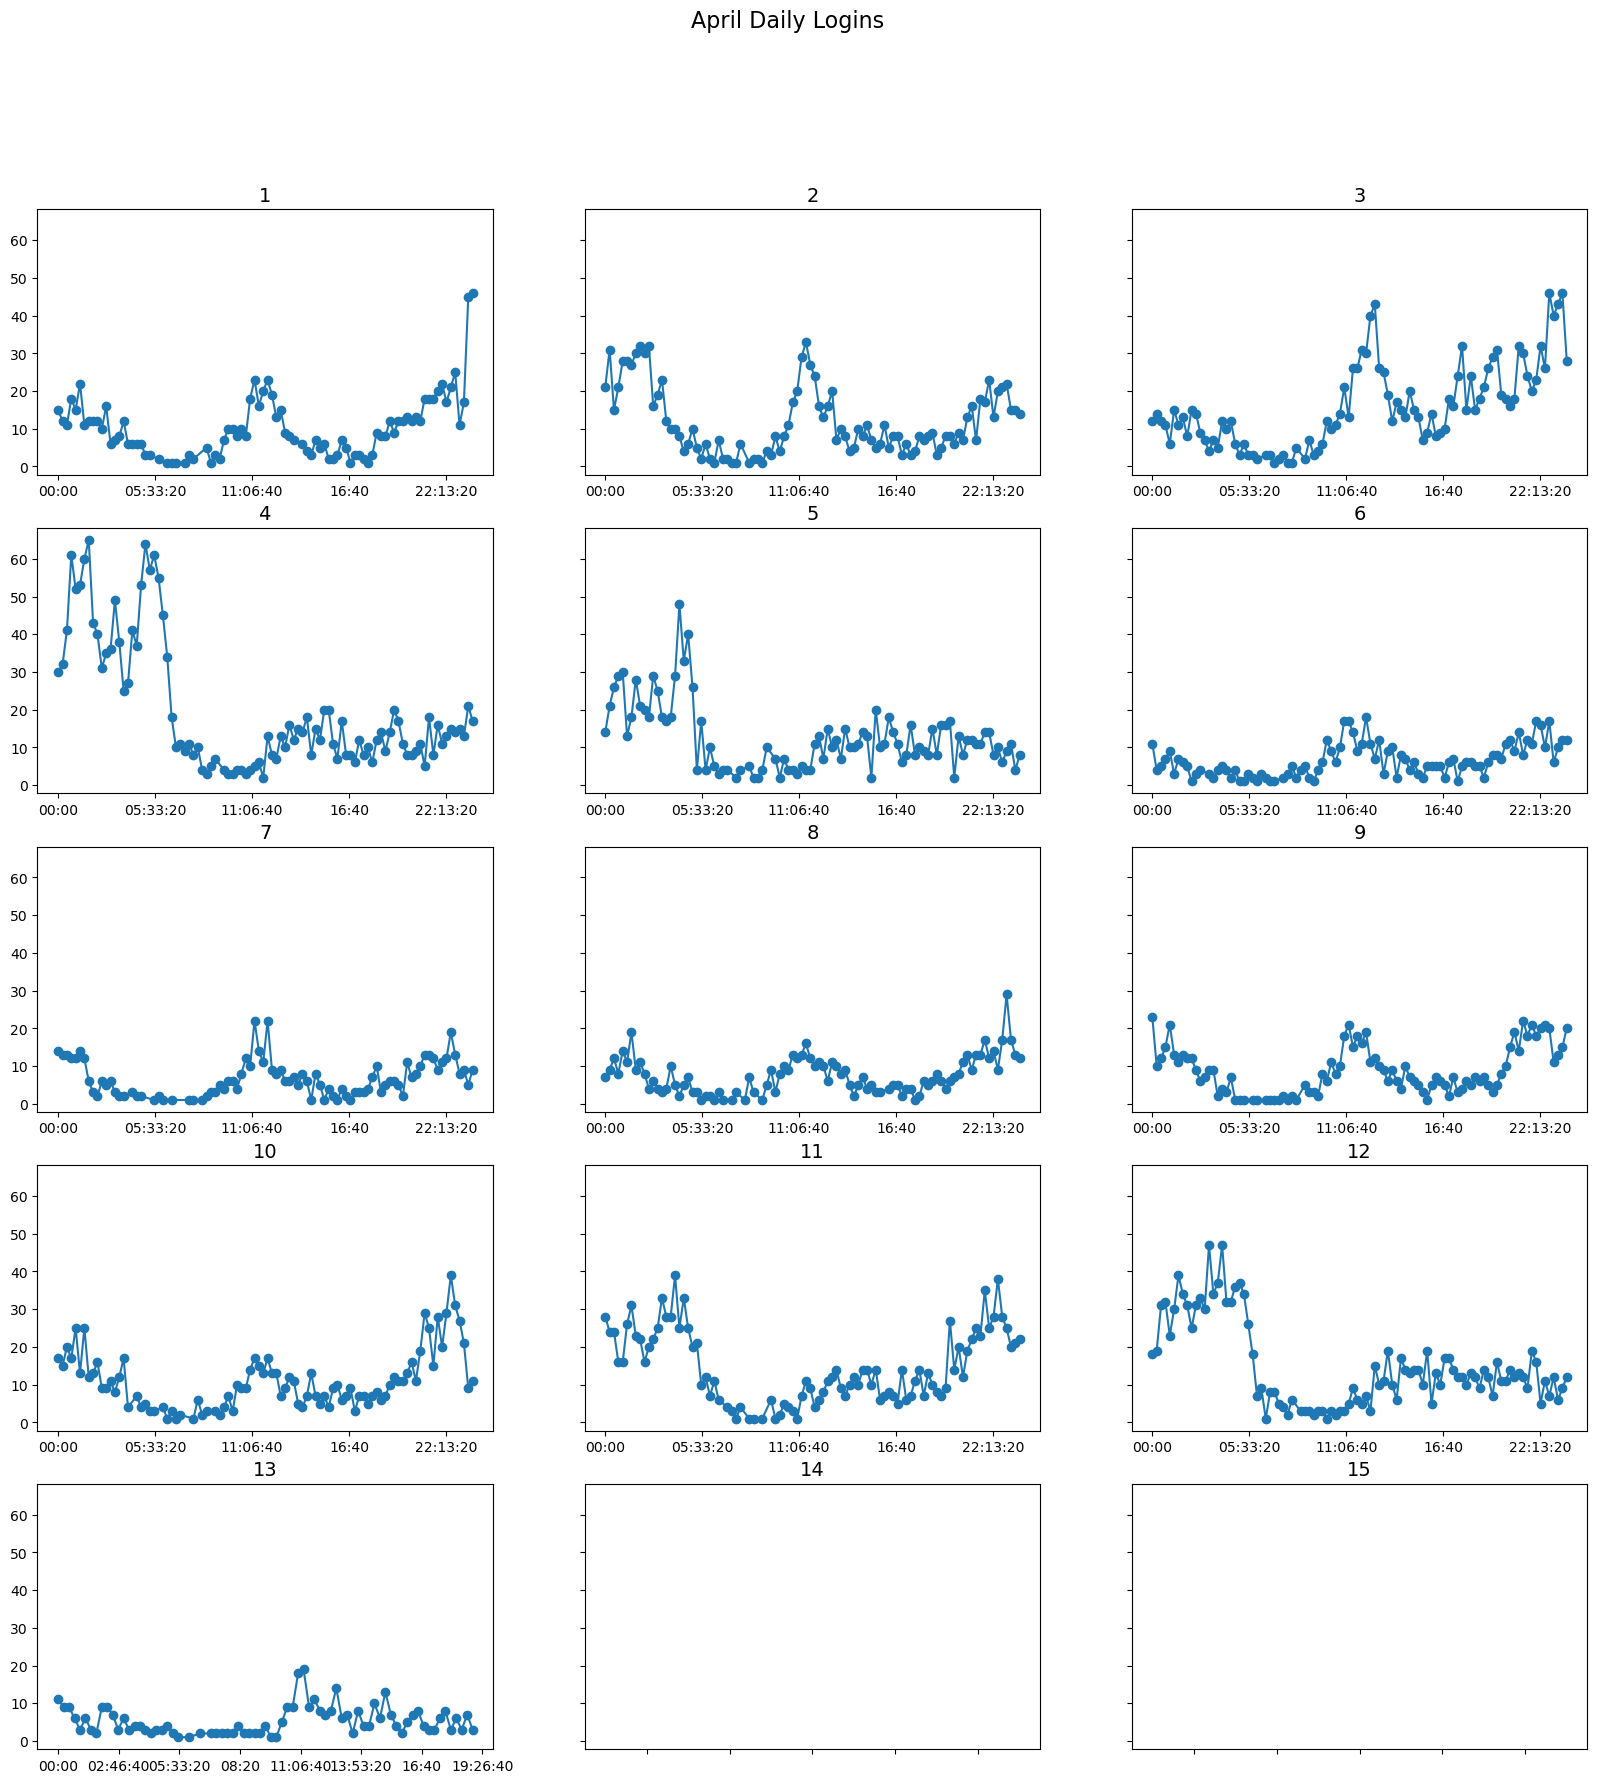

In [22]:
days = range(1, 16)

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,20), sharey=True)
fig.suptitle('April Daily Logins', fontsize=16)

for day, ax in zip(days, axs.ravel()):
    apr_day = apr[apr['day'] == day]
    apr_day.plot(x='time', y='logins', ax=ax, marker='o')
    
    ax.set_title(day, fontsize=14)
    ax.get_legend().remove()
    ax.set_xlabel('')
    
plt.show()

## Part 3 Code

In [23]:
file = open('ultimate_data_challenge.json')
load = json.load(file)
user_df = pd.DataFrame(load)

In [24]:
max(user_df['last_trip_date'])

'2014-07-01'

In [25]:
mask = user_df[user_df['last_trip_date'] >= '2014-06-01']
mask

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
13,King's Landing,0,2014-01-29,4.0,1.38,2014-06-08,iPhone,50.0,False,50.0,3.04,5.0
16,King's Landing,1,2014-01-11,5.0,1.00,2014-06-28,Android,0.0,True,50.0,10.86,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49976,King's Landing,0,2014-01-21,2.0,1.00,2014-07-01,iPhone,0.0,False,100.0,2.39,4.0
49988,King's Landing,1,2014-01-20,4.5,1.00,2014-06-14,iPhone,0.0,False,50.0,2.53,5.0
49991,Winterfell,0,2014-01-08,5.0,1.25,2014-06-29,iPhone,100.0,False,0.0,1.06,5.0
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7


In [26]:
user_df['retained'] = 'no'
user_df.loc[user_df.index.isin(mask.index), 'retained'] = 'yes'

In [27]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [28]:
user_df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
retained                     0
dtype: int64

In [29]:
user_df_copy = user_df.dropna()

In [30]:
X = user_df_copy.loc[:, user_df.columns != 'retained']
y = user_df_copy['retained']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [32]:
num_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

scaler = MinMaxScaler().fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [33]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [34]:
replace_dict = {True: 1, False: 0}
X_train = X_train.replace(replace_dict)
X_test = X_test.replace(replace_dict)

In [35]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('score on test: ' + str(rfc.score(X_test, y_test)))
print('score on train: ' + str(rfc.score(X_train, y_train)))
print(classification_report(y_test, y_pred))

score on test: 0.9779636480617662
score on train: 1.0
              precision    recall  f1-score   support

          no       0.99      0.98      0.98      7361
         yes       0.97      0.98      0.97      5073

    accuracy                           0.98     12434
   macro avg       0.98      0.98      0.98     12434
weighted avg       0.98      0.98      0.98     12434



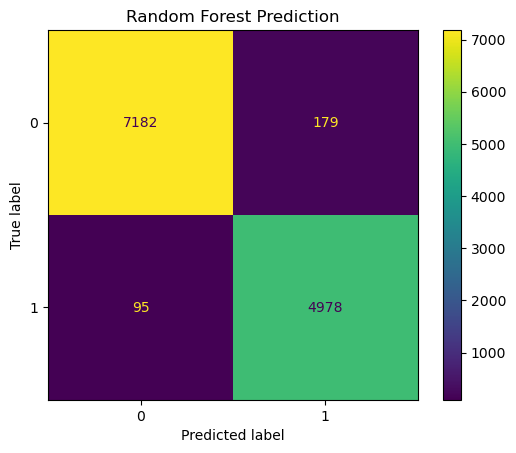

In [36]:
pl = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(pl)
disp.plot()
plt.title('Random Forest Prediction')
plt.show()

In [37]:
user_df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [39]:
mask['phone'].value_counts()

iPhone     15525
Android     3146
Name: phone, dtype: int64

In [38]:
user_df['ultimate_black_user'].value_counts()

False    31146
True     18854
Name: ultimate_black_user, dtype: int64

In [40]:
mask['ultimate_black_user'].value_counts()

True     9497
False    9307
Name: ultimate_black_user, dtype: int64

In [41]:
user_df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [42]:
mask['city'].value_counts()

Winterfell        8213
King's Landing    6363
Astapor           4228
Name: city, dtype: int64